# Step 2a

This notebook integrates over the energy dimension, producing a 4D array in the transverse coordinates for later analysis. It can be skipped.

In [1]:
import sys
import os
from os.path import join
import time
from datetime import datetime
import importlib
import numpy as np
import pandas as pd
import h5py
import imageio
from scipy import ndimage
from scipy import interpolate
import skimage
from tqdm import tqdm
from tqdm import trange
from matplotlib import pyplot as plt
import proplot as pplt

sys.path.append('../..')
from tools import energyVS06 as energy
from tools import image_processing as ip
from tools import plotting as mplt
from tools import utils

In [2]:
pplt.rc['grid'] = False
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'viridis'

Load some info from previous notebook.

In [3]:
shape = tuple(np.loadtxt('rawgrid_shape.txt').astype(int))
ny, nx = shape[-2:]
print('a5d.shape:', shape)

file = open('im_dtype.txt', 'r')
im_dtype = file.readline()
file.close()
print('im_dtype:', im_dtype)

filename = 'rawgrid_220429190854-scan-xxpy-image-ypdE.mmp'
a5d = np.memmap(filename, shape=shape, dtype=im_dtype, mode='r')

a5d.shape: (33, 33, 32, 147, 194)
im_dtype: float64


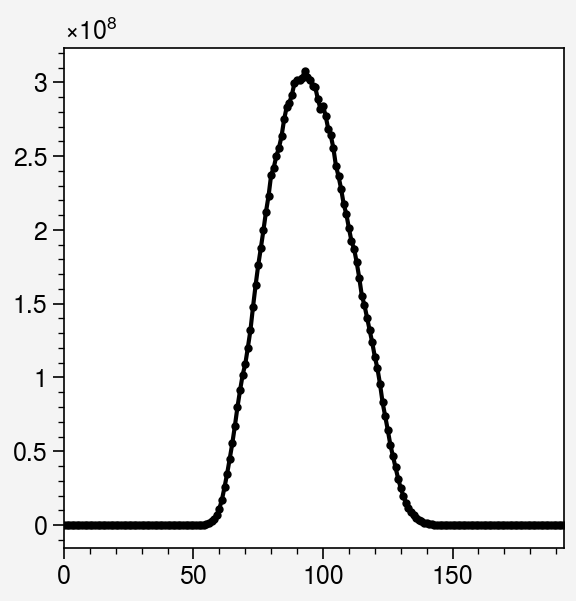

In [4]:
fig, ax = pplt.subplots()

proj_x3 = utils.project(a5d, 4)
ax.plot(np.abs(proj_x3), marker='.', color='black', ms=4)
plt.show()

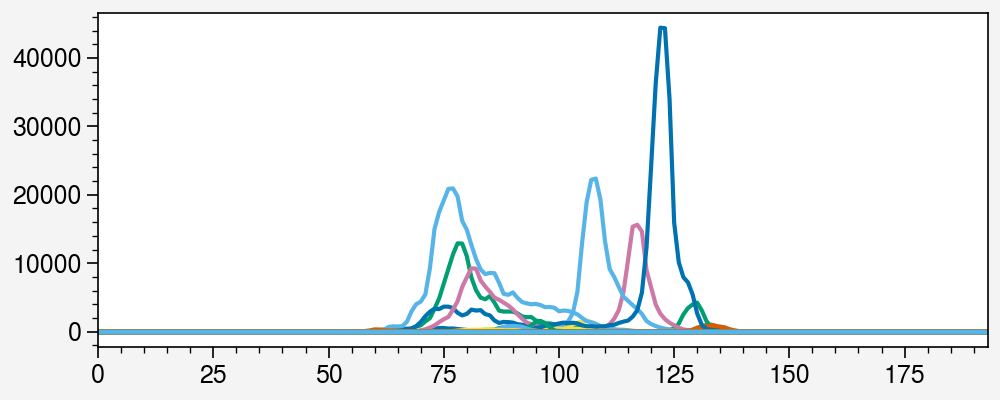

In [5]:
islice = 4
slice_size = a5d.size / a5d.shape[islice]
slice_shape = [a5d.shape[i] for i in range(a5d.ndim) if i != islice]
axis = [i for i in range(a5d.ndim) if i != islice]

fig, ax = pplt.subplots(figsize=(5, 2))
for i in range(300):
    ind = np.unravel_index(np.random.randint(slice_size), slice_shape)
    a5d_slice = utils.slice_array(a5d, axis, ind)    
    ax.plot(np.abs(a5d_slice), marker='.', ms=0)
plt.show()

Integrate over the energy axis.

In [6]:
a4d = np.sum(a5d, axis=4)  # [x1, x2, y1, y3]
del a5d

## Analysis 

In [7]:
X1, X2, Y1 = np.load('slit_coordinates_220429190854-scan-xxpy-image-ypdE.npy')

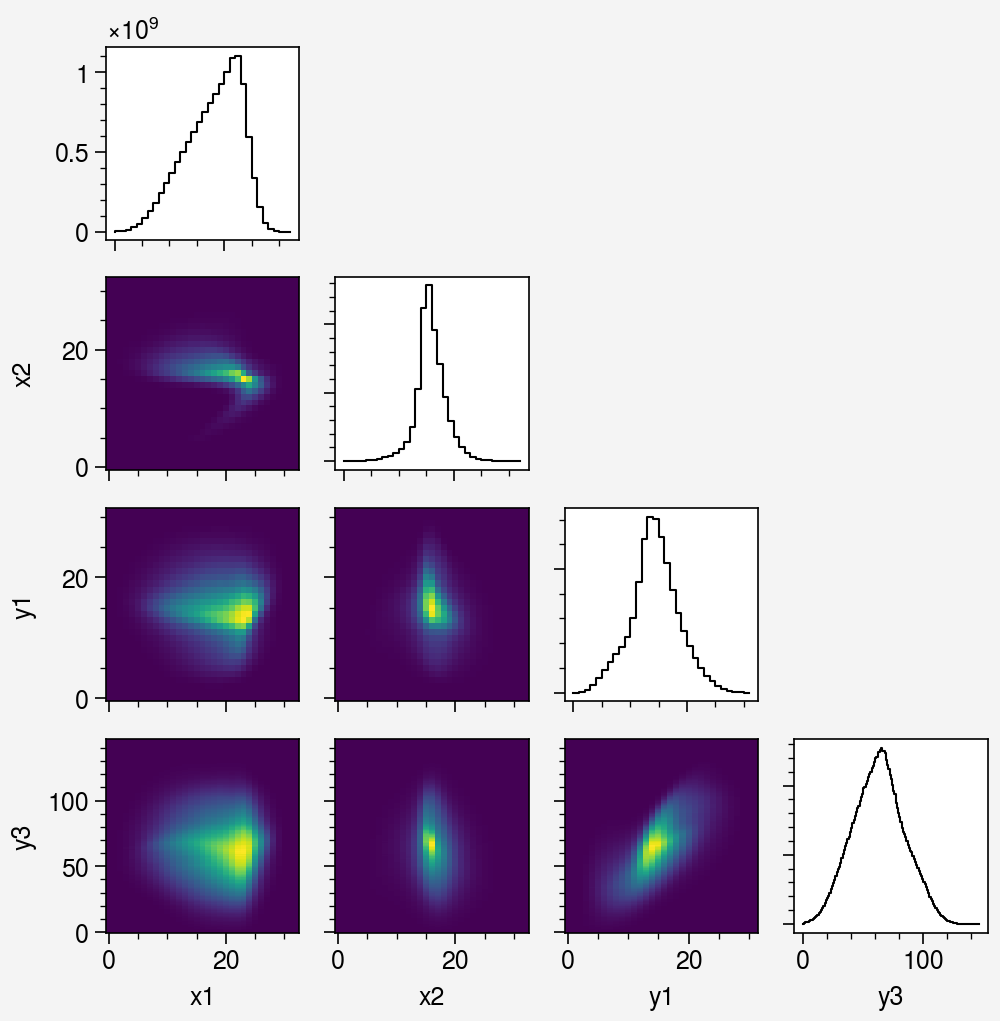

In [8]:
axes = mplt.corner(
    a4d, 
    labels=['x1', 'x2', 'y1', 'y3'], 
    fig_kws=dict(figwidth=5.0),
    diag_kind='step',
    diag_kws=dict(lw=0.75),
)

In [9]:
savefilename = 'integrated4D_' + filename.split('.mmp')[0]
np.savez_compressed(savefilename, a4d=a4d)

[To do]